In [3]:
from __future__ import print_function
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
def tr(x):
    if x ==' ':
        return 0.    
    if 'A'<=x <='Z':
        return (ord(x)-ord('A'))*1.0/26*0.8+0.2
    return 1.0
def text_graph(s):
    w, h = max(map(len, s)), len(s)    
    ar = np.array([[ tr(l[i]) if i <len(l) else 0. for i in range(w)] for l in s])
    plt.imshow(ar, aspect='equal', interpolation='bilinear', cmap=matplotlib.cm.gray)
%matplotlib inline

### 先用 cython 編譯

In [39]:
! cd brainfuck/;make

make: Nothing to be done for 'all'.


先跑幾個簡單的例子

In [3]:
!python2 brainfuck/bf0_original.py brainfuck/bf/helloworld.bf

Hello World!


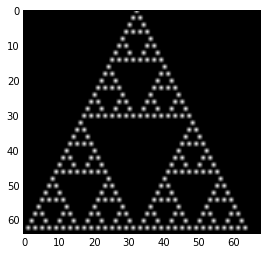

In [57]:
rtn = !python2 brainfuck/bf0_original.py brainfuck/bf/tri.bf
text_graph(rtn)

now benchmarking

In [ ]:
%%timeit -n 1 -r 1
rtn = !python2 brainfuck/bf0_original.py brainfuck/bf/mandelbrot.bf
text_graph(rtn)

1 loops, best of 1: 6min 13s per loop


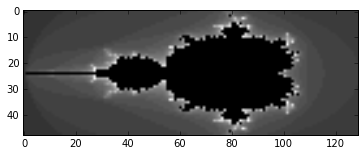

In [9]:
%%timeit -n 1 -r 1
rtn = !pypy brainfuck/bf0_original.py brainfuck/bf/mandelbrot.bf
text_graph(rtn)

In [ ]:
%%timeit -n 1 -r 1
rtn = !brainfuck/bf0 brainfuck/bf/mandelbrot.bf
text_graph(rtn)

In [ ]:
%%timeit -n 1 -r 1
rtn = !brainfuck/bf1 brainfuck/bf/mandelbrot.bf
text_graph(rtn)

In [ ]:
%%timeit -n 1 -r 1
rtn = !python2 brainfuck/bf3_list_all.py brainfuck/bf/mandelbrot.bf
text_graph(rtn)

1 loops, best of 1: 3min 35s per loop


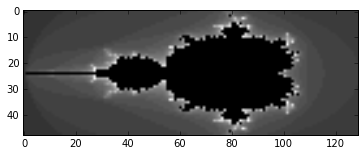

In [8]:
%%timeit -n 1 -r 1
rtn = !pypy brainfuck/bf3_list_all.py brainfuck/bf/mandelbrot.bf
text_graph(rtn)

1 loops, best of 1: 1min 20s per loop


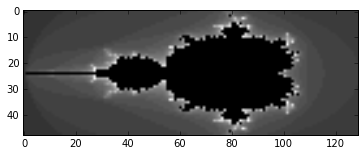

In [12]:
%%timeit -n 1 -r 1
rtn = !brainfuck/bf3 brainfuck/bf/mandelbrot.bf
text_graph(rtn)

In [ ]:
%%timeit -n 1 -r 1
rtn = !python2 brainfuck/bf4_merge.py brainfuck/bf/mandelbrot.bf
text_graph(rtn)

1 loops, best of 1: 3min 25s per loop


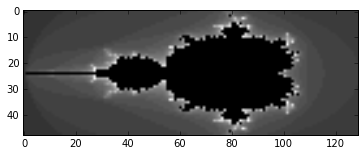

In [5]:
%%timeit -n 1 -r 1
rtn = !pypy brainfuck/bf4_merge.py brainfuck/bf/mandelbrot.bf
text_graph(rtn)

1 loops, best of 1: 1min 46s per loop


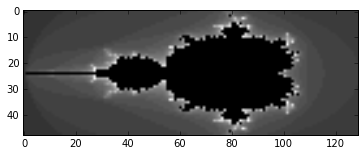

In [11]:
%%timeit -n 1 -r 1
rtn = !brainfuck/bf4 brainfuck/bf/mandelbrot.bf
text_graph(rtn)

把 bf4 的 .py 和 .pxd 合併成 .pyx，速度會變快

1 loops, best of 1: 1min 13s per loop


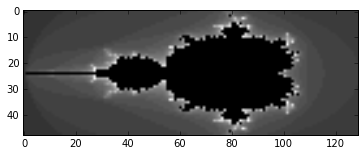

In [14]:
%%timeit -n 1 -r 1
rtn = !brainfuck/bfx4 brainfuck/bf/mandelbrot.bf
text_graph(rtn)

繼續改進成 bf5

1 loops, best of 1: 1h 27min 56s per loop


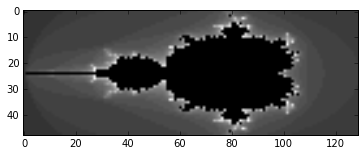

In [6]:
%%timeit -n 1 -r 1
rtn = !python2 brainfuck/bf5_improved.py brainfuck/bf/mandelbrot.bf
text_graph(rtn)

1 loops, best of 1: 1min 17s per loop


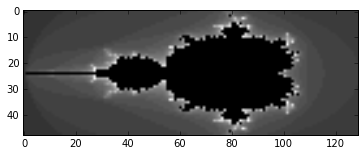

In [63]:
%%timeit -n 1 -r 1
rtn = !pypy brainfuck/bf5_improved.py brainfuck/bf/mandelbrot.bf
text_graph(rtn)

1 loops, best of 1: 29 s per loop


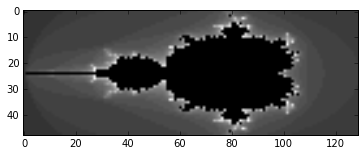

In [13]:
%%timeit -n 1 -r 1
rtn = !brainfuck/bf5 brainfuck/bf/mandelbrot.bf
text_graph(rtn)

1 loops, best of 1: 24.9 s per loop


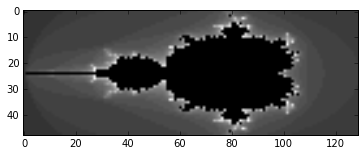

In [15]:
%%timeit -n 1 -r 1
rtn = !brainfuck/bfx5 brainfuck/bf/mandelbrot.bf
text_graph(rtn)

bf6 是 inline compile 版本

1 loops, best of 1: 1.53 s per loop


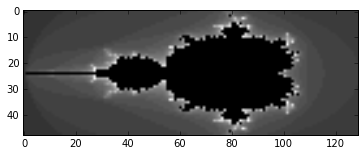

In [19]:
%%timeit -n 1 -r 1
rtn = !python2 brainfuck/bf6_inline.py brainfuck/bf/mandelbrot.bf
text_graph(rtn)

跟用 C 寫的，最快的  interpreter bff4 比較

1 loops, best of 1: 5.29 s per loop


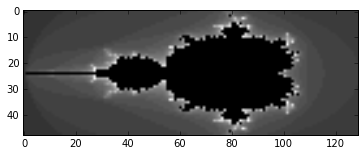

In [20]:
%%timeit -n 1 -r 1
rtn = !brainfuck/bff4  < brainfuck/bf/mandelbrot.bf
text_graph(rtn)